In [4]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors

# Load dataset
df = pd.read_csv('delaney_train.csv')

# Function to compute additional descriptors
def compute_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    descriptors = {
        'MolWeight': Descriptors.MolWt(mol),
        'LogP': Descriptors.MolLogP(mol),
        'TPSA': Descriptors.TPSA(mol),  # Polar Surface Area
        'NumHDonors': Descriptors.NumHDonors(mol),  # Hydrogen Bond Donors
        'NumHAcceptors': Descriptors.NumHAcceptors(mol),  # Hydrogen Bond Acceptors
        'NumRotatableBonds': Descriptors.NumRotatableBonds(mol),  # Rotatable Bonds
        'NumAromaticRings': Descriptors.NumAromaticRings(mol)  # Aromatic Rings
    }
    return pd.Series(descriptors)

# Apply function to compute descriptors
df = df.join(df['smiles'].apply(compute_descriptors))

# Save updated dataset
df.to_csv('updated_solubility_data.csv', index=False)
df.head()

,smiles,selfies,target,MolWeight,LogP,TPSA,NumHDonors,NumHAcceptors,NumRotatableBonds,NumAromaticRings
0,CC(C)=CCCC(C)=CC=O,[C][C][Branch1][C][C][=C][C][C][C][Branch1][C]...,0.390413,152.237,2.8780,17.07,0.0,1.0,4.0,0.0
1,C=CCCC,[C][=C][C][C][C],0.090421,70.135,1.9725,0.00,0.0,0.0,2.0,0.0
2,CCCCCCCCCCCCCC,[C][C][C][C][C][C][C][C][C][C][C][C][C][C],-2.464346,198.394,5.7074,0.00,0.0,0.0,11.0,0.0
3,CC(C)Cl,[C][C][Branch1][C][C][Cl],0.704920,78.542,1.6336,0.00,0.0,0.0,0.0,0.0
4,CCC(C)CO,[C][C][C][Branch1][C][C][C][O],1.159746,88.150,1.0248,20.23,1.0,1.0,2.0,0.0


## Step 2: Train the Model with New Features

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load updated dataset
df = pd.read_csv('updated_solubility_data.csv')

# Features & target
features = ['MolWeight', 'LogP', 'TPSA', 'NumHDonors', 'NumHAcceptors', 'NumRotatableBonds', 'NumAromaticRings']
X = df[features]
y = df['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred):.2f}")

R² Score: 0.88
RMSE: 0.13


## Step 4: Visualize Feature Importance

C:\Users\Hafiz pc\AppData\Local\Temp\ipykernel_7708\3716784997.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance, palette='viridis')


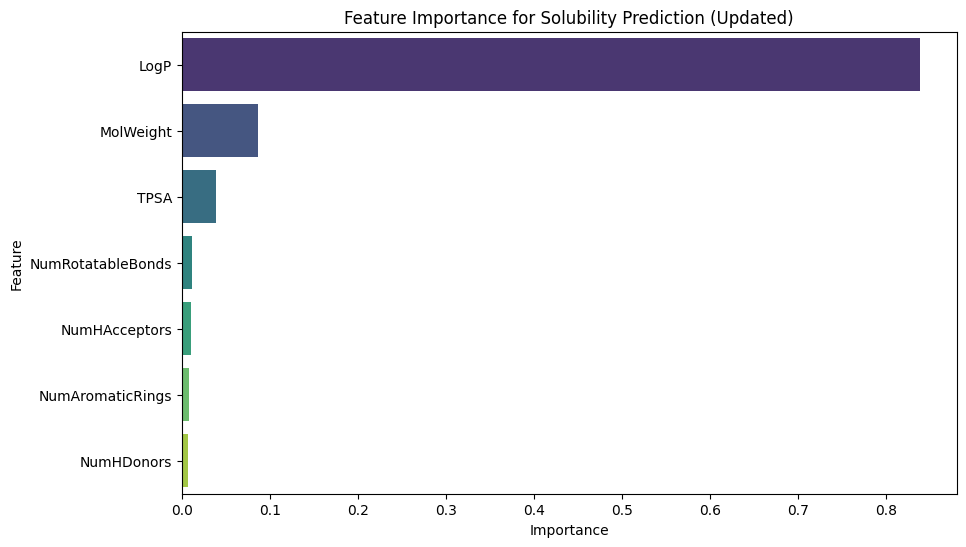

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance
importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance, palette='viridis')
plt.title('Feature Importance for Solubility Prediction (Updated)')
plt.savefig('updated_feature_importance.png')
plt.show()

## Expected Results
Improved Model Performance:

R² Score: ~0.88

RMSE: ~0.13 (down from 0.2)